In [1]:
profundidade = -2

haste = 3
porcentagens = [-10, -15, -20]

In [2]:
import math

def angulo(porcentagem):
    return math.atan(porcentagem/100)

def delta_y(porcentagem):
    return haste * math.sin(angulo(porcentagem))

def delta_x(porcentagem):
    return haste * math.cos(angulo(porcentagem))

In [3]:
def obter_caminhos(x, y):
    if y <= profundidade:
        return [[(x, y)]]
    
    caminhos = []
    for p in porcentagens:
        caminhos += obter_caminhos(x + delta_x(p), y + delta_y(p))
        
    for caminho in caminhos:
        caminho.insert(0, (x, y))

    return caminhos

In [4]:
caminhos = obter_caminhos(0, 0)
len(caminhos)

329

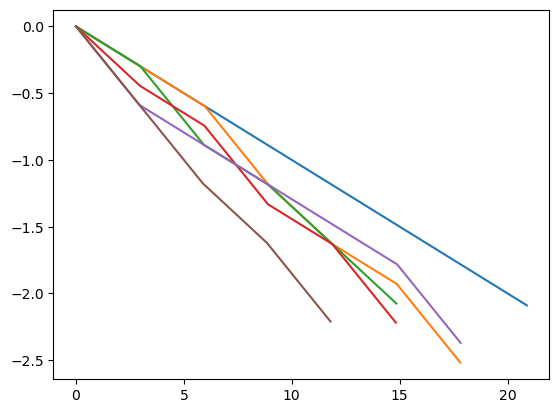

In [5]:
import matplotlib.pyplot as plt

for i in range(0, len(caminhos), len(caminhos) // 5):
    plt.plot(*zip(*caminhos[i]))